In [150]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math


df = pd.read_csv('./datasets/new_bovespa_stocks.csv')

In [151]:
df = df.drop(columns=['Unnamed: 0','Example'])

In [152]:
Symbols = pd.unique(df['Symbol'])
Symbols

array(['SMAB11', 'MMXM3', 'BMIN3', 'BRPR3', 'WEST3', 'JBSS3', 'ITUB3',
       'BMGB4', 'DEXP4', 'GRAO3', 'LAND3', 'CMIG3', 'B39', 'HOOT4',
       'STOC31', 'INEP3', 'BKYY39', 'DMMO3', 'CLSC4', 'SAPR11', 'BRSR6',
       'O3', 'D2KN34', 'PMAM3', 'PETR3', 'PETR4', 'CATP34', 'CTKA4',
       'CRPG5', 'CPLE5', 'BMLC11', 'SPXB11', 'ENMT4', 'BOEF39', 'IFCM3',
       'COLG34', 'BIYE39', 'RAIZ4', 'BRAP3', 'UPSS34', 'SBSP3', 'SANB3',
       'AFHI11', 'CEAB3', 'PGCO34', 'CASN4', 'GETT4', 'BBDC4', 'BIYT39',
       'TTEN3', 'CBAV3', 'MYPK3', 'GOGL35', 'RECR11', 'BPAN4', 'RNEW4',
       'JHSF3', 'JGPX11', 'BIVE39', 'CEGR3', 'CRPG3', 'MERC4', 'SANB4',
       'AMAR3', 'WHRL4', 'VSEC11', 'PCAR3', 'EQIR11', 'GEPA3', 'C3',
       'CAML3', 'BFXH39', 'ARML3', 'CPFE3', 'DESK3', 'RNEW3', 'RSID3',
       'BCWV39', 'PURB11', 'AMBP3', 'COGN3', 'BALM3', 'ABTT34', 'PEPB34',
       'AERI3', 'CSNA3', 'S2QS34', 'DOTZ3', 'ITUB4', 'BBDC3', 'AGXY3',
       'SMFT3', 'ALUP11', 'BIVW39', 'C2OI34', 'BEEF3', 'WFCO34', 'MORC1

In [153]:
def plot_symbol(Symbol:str):
    symbol_df = df[df['Symbol']==Symbol]
    plt.scatter(pd.to_datetime(symbol_df['Date']), symbol_df['Close'], s=1, c='blue')
    plt.scatter(pd.to_datetime(symbol_df['Date']), symbol_df['Taxa Selic'], s=1, c='red')

    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f"{Symbol}")    

    handle_patches = [mpatches.Patch(color='red', label='Selic'),mpatches.Patch(color='blue', label='Close')]

    plt.legend(handles=handle_patches, loc='upper right')

    plt.grid(True)
    plt.show()


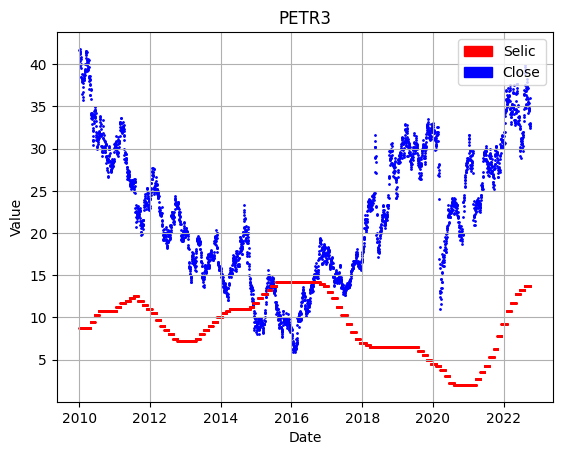

In [154]:
plot_symbol('PETR3')

In [155]:
def correlation_by_symbol(Symbol:str, column_name:str):
    symbol_df = df[df['Symbol']==Symbol]
    correlation = symbol_df[column_name].corr(symbol_df['Taxa Selic'])
    return correlation


In [156]:
symbols = pd.unique(df['Symbol'])
correlations_by_symbol = [{"Symbol":symbol, "correlation":correlation_by_symbol(symbol, 'Close')} for symbol in symbols]


/opt/homebrew/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/homebrew/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [157]:
filtered_correlations_by_symbol = [d for d in correlations_by_symbol if not math.isnan(d['correlation'])]

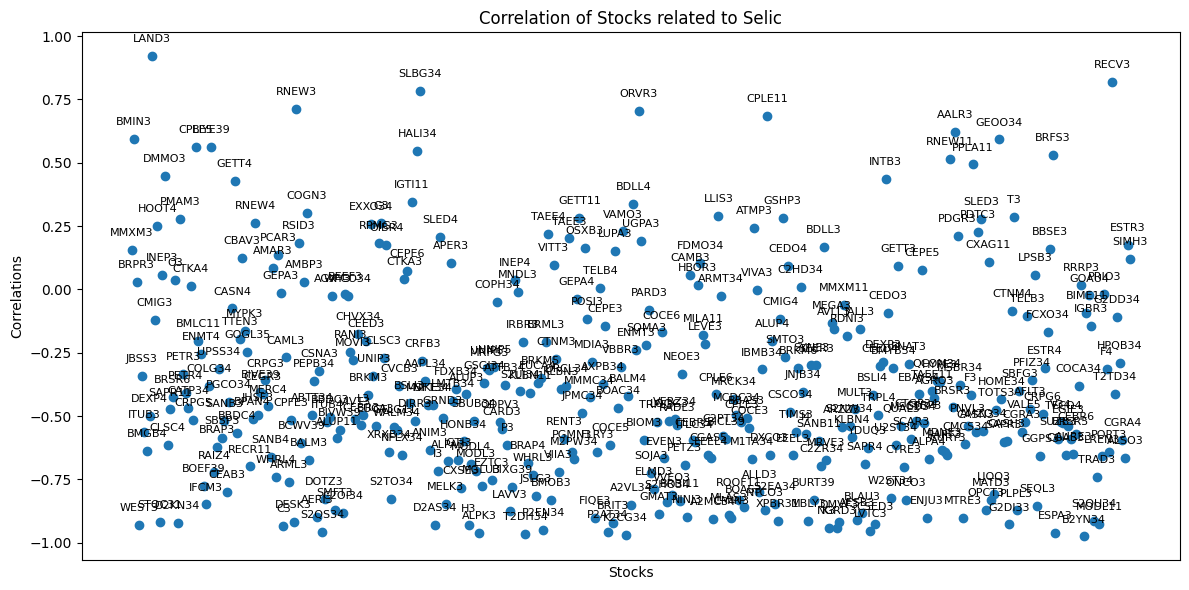

In [159]:
filtered_symbols = [item['Symbol'] for item in filtered_correlations_by_symbol]
filtered_correlations = [item['correlation'] for item in filtered_correlations_by_symbol]

# Increase the figure size
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(range(len(filtered_correlations)), filtered_correlations)
ax.set_xlabel('Stocks')
ax.set_ylabel('Correlations')
ax.set_title('Correlation of Stocks related to Selic')
#ax.set_xticks(range(len(filtered_correlations)))
#ax.set_xticklabels(filtered_symbols, rotation=90, fontsize=8)

ax.set_xticks([])
ax.set_xticklabels([])

for i, (symbol, correlation) in enumerate(zip(filtered_symbols, filtered_correlations)):
    ax.annotate(symbol, (i, correlation), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

In [160]:
df_stocks_correlation=pd.DataFrame(filtered_correlations_by_symbol)

In [161]:
df_stocks_correlation['abs_correlation'] = df_stocks_correlation['correlation'].abs()
df_stocks_correlation

,Symbol,correlation,abs_correlation
0,MMXM3,0.156980,0.156980
1,BMIN3,0.592486,0.592486
2,BRPR3,0.030361,0.030361
3,WEST3,-0.931172,0.931172
4,JBSS3,-0.341230,0.341230
...,...,...,...
384,HPQB34,-0.290295,0.290295
385,CGRA4,-0.594249,0.594249
386,ALSO3,-0.664792,0.664792
387,ESTR3,0.176679,0.176679


In [162]:
df_stocks_correlation.sort_values(by='abs_correlation', ascending=False)

,Symbol,correlation,abs_correlation
370,B2YN34,-0.975167,0.975167
192,K2CG34,-0.968678,0.968678
153,T2DH34,-0.966047,0.966047
359,ESPA3,-0.961519,0.961519
135,ALPK3,-0.960952,0.960952
...,...,...,...
23,CTKA4,0.012622,0.012622
260,C2HD34,0.009546,0.009546
150,MNDL3,-0.009487,0.009487
182,TELB4,0.006066,0.006066
